# Ford GoBike System Data Analysis
## by Sarah Alwadaah

## Investigation Overview

In this investigation, I wanted to analyze rides of a bike-sharing system covering the greater San Francisco Bay area. The main focus was on the duration and distance of rides as well as date and user type.

## Dataset Overview

The dataset consists of 4,890,404 bike-sharing rides between June 2017 and December 2019, and has 12 features including: duration (in seconds), start and end stations, distance (in km), start and end dates amongst others. latitude and longitude informations were removed after extracting the distance using them, rental access method was also removed since it was irrelevant to the analysis.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
rides = pd.read_csv('rides_clean.csv')

## Percentage of Subscribed Users

All riders in the dataset are made by customers or subscribers to the bike-sharing system. To have a general idea about the number of subscribers and customers I used pie chart displaying the relative values for both user types where subscriber make up the vast majority of bike-sharing system users.

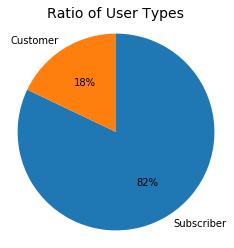

In [3]:
# percentage of subscribers and customers to use for labels
p1 = rides.query("user_type == 'Subscriber'").shape[0]/rides.shape[0]
p2 = rides.query("user_type == 'Customer'").shape[0]/rides.shape[0]

perc= [p1,p2]
plt.pie(perc, labels = ['Subscriber','Customer'], startangle = 90, counterclock = False, autopct='%1.0f%%')
plt.axis('square');

plt.title('Ratio of User Types', fontsize = 14);

## Duration and Distance of Rides

The main variable of interest are duration and distance of rides. Exploring both using histogram to plot the continues numeric values showed the majority of users take rides that last 5 to 15 minutes on average and travel 0.5 to 1.5 km from start to end stations. Both plots are is right-skewed with peaks of 10 minutes for duration and 1-1.5 km for distance. 

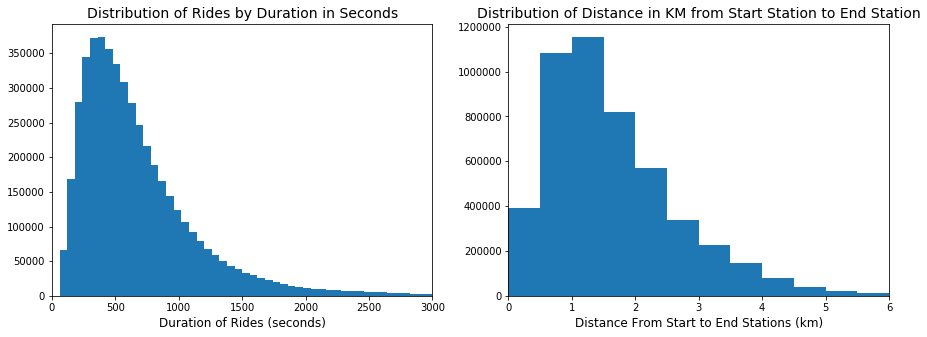

In [7]:
plt.figure(figsize=[15,5])


plt.subplot(1, 2, 1)
bin_edges = np.arange(0, rides['duration_sec'].max()+60, 60)
plt.hist(data = rides, x = 'duration_sec', bins = bin_edges);
plt.xlim(0,3000)
plt.title('Distribution of Rides by Duration in Seconds', fontsize = 14);
plt.xlabel('Duration of Rides (seconds)', fontsize = 12);
plt.ylabel('');

plt.subplot(1, 2, 2)
bin_edges = np.arange(0, rides['distance_km'].max()+0.5, 0.5)
plt.hist(data = rides, x = 'distance_km', bins = bin_edges);
plt.xlim(0,6)
plt.title('Distribution of Distance in KM from Start Station to End Station', fontsize = 14);
plt.xlabel('Distance From Start to End Stations (km)', fontsize = 12);
plt.ylabel('');


## Number of Rides by Month for Each Year (2017 - 2019) 

An interesting view to look at is by date. Identifying patterns month by month for the three years showed a decrease during winter compared to other months. For 2019, generally, more rides were taken in spring (March - May) compared to summer where only July showed a high number of rides. Rides taken in 2018 are highest in summer months. This difference between the two years can be linked to the high temprature witnessed by the city in 2019 due to climate changing. For 2017, since data starts from June, excluding spring most rides were taken in autumn (Sep - Nov). 

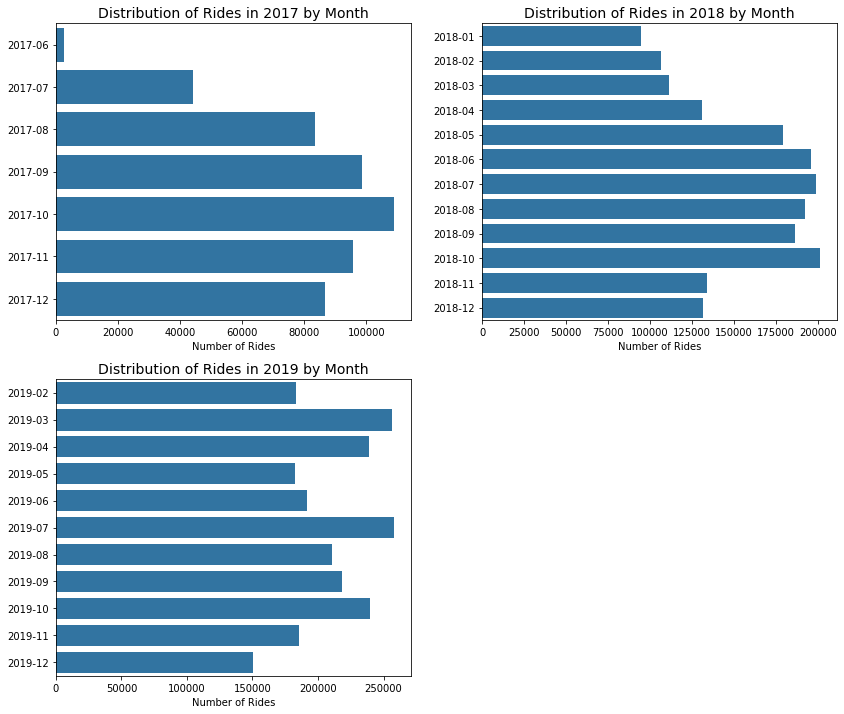

In [14]:
plt.figure(figsize = (14, 12))

plt.subplot(2, 2, 1)
base_color = sb.color_palette()[0]
sb.countplot(data = rides.sort_values(by='year_month'), y = 'year_month', color = base_color,order=sorted(rides.year_month.unique())[:7]);
plt.title('Distribution of Rides in 2017 by Month',fontsize = 14)
plt.ylabel('');
plt.xlabel('Number of Rides');

plt.subplot(2, 2, 2)
sb.countplot(data = rides.sort_values(by='year_month'), y = 'year_month', color = base_color,order=sorted(rides.year_month.unique())[7:19]);
#plt.xticks(rotation = 90);
plt.title('Distribution of Rides in 2018 by Month',fontsize = 14)
plt.ylabel('');
plt.xlabel('Number of Rides');

plt.subplot(2, 2, 3)
sb.countplot(data = rides.sort_values(by='year_month'), y = 'year_month', color = base_color,order=sorted(rides.year_month.unique())[20:31]);
#plt.xticks(rotation = 90);
plt.title('Distribution of Rides in 2019 by Month',fontsize = 14)
plt.ylabel('');
plt.xlabel('Number of Rides');

## Duration and Distance of Rides By Different User Types

Generally customers use the bike-sharing system for longer rides where the distance between the start and end station is greater compared to subscriber that use the system for short rides. This can be linked to customers having to use a bike when they need to go far and it's tiring by foot, while subscribers have their privilage of using the bike-sharing system for any duration and distance.

(0, 5)

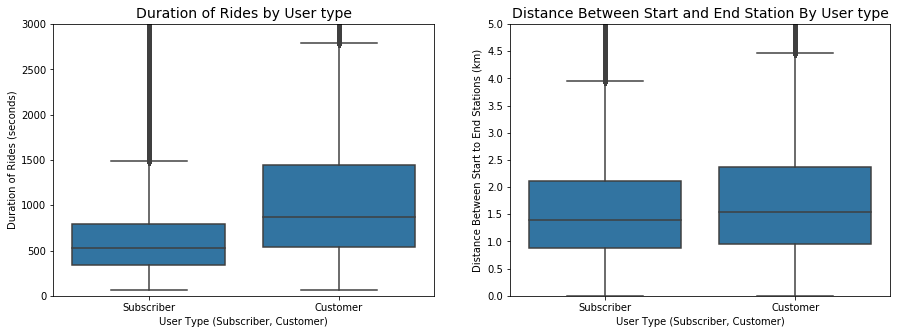

In [16]:
plt.figure(figsize = (15, 5))
plt.subplot(1, 2, 1)
base_color = sb.color_palette()[0]
sb.boxplot(data = rides, x = 'user_type', y = 'duration_sec',color = base_color)#, order = myorder );
plt.ylim(0,3000)
plt.title('Duration of Rides by User type', fontsize = 14)
plt.ylabel('Duration of Rides (seconds)')
plt.xlabel('User Type (Subscriber, Customer)')



plt.subplot(1, 2, 2)
base_color = sb.color_palette()[0]
sb.boxplot(data = rides, x = 'user_type', y = 'distance_km',color = base_color)#, order = myorder );
plt.yticks(np.arange(0, 5+0.5, 0.5))
plt.title('Distance Between Start and End Station By User type', fontsize = 14)
plt.ylabel('Distance Between Start to End Stations (km)')
plt.xlabel('User Type (Subscriber, Customer)')
plt.ylim(0,5)

## Duration of Rides by Months from June 2017 - December 2019 for Each User Type

To analyze the previous patterns further, subscriber of the bike sharing system use it for less time compared to customers which remained stable throughout the years. Also, the rides taken in cold months for subscribers take slighly less time compared to other months thoughout the years.

As for customers, the number of ride is not stable; it witnessed a big decline throughout the years. It's also very clear the duratoin of rides is great compared to subscribers. Interestingly, unlike sucsribers, the time of the year does not play a big role in number of rides made by customers, this can be due the fact that a customer would usually use the bike-sharing system only they need to regardless of weather.

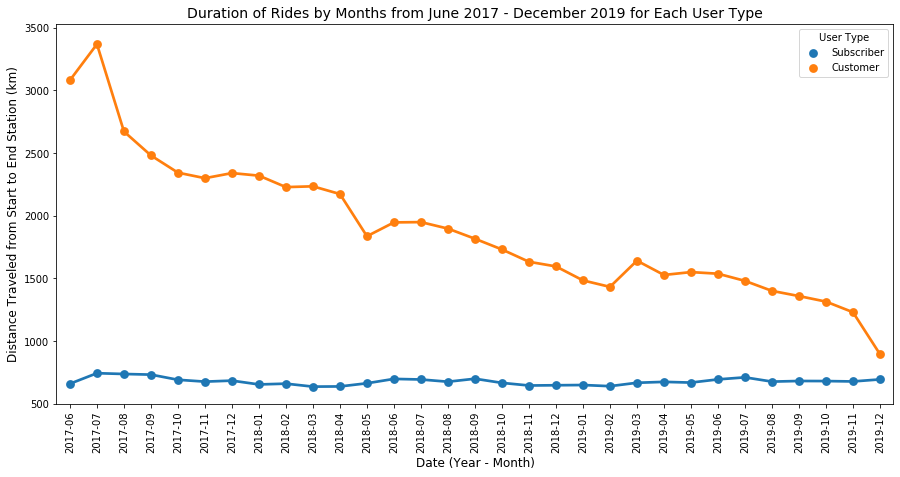

In [17]:
plt.figure(figsize = (15, 7))
sb.pointplot(data = rides.sort_values(by='year_month'), x = 'year_month', y = 'duration_sec',
             hue = 'user_type', ci = None);
plt.xticks(rotation = 90);
plt.title('Duration of Rides by Months from June 2017 - December 2019 for Each User Type',fontsize = 14)
plt.xlabel('Date (Year - Month)',fontsize = 12)
plt.ylabel('Distance Traveled from Start to End Station (km)', fontsize = 12)
plt.legend(title = 'User Type')

> Once you're ready to finish your presentation, check your output by using
nbconvert to export the notebook and set up a server for the slides. From the
terminal or command line, use the following expression:
> > `jupyter nbconvert <file_name>.ipynb --to slides --post serve --template output_toggle`

> This should open a tab in your web browser where you can scroll through your
presentation. Sub-slides can be accessed by pressing 'down' when viewing its parent
slide. Make sure you remove all of the quote-formatted guide notes like this one
before you finish your presentation!